# 네이버 파인튜닝을 위한 파일 만들기

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [6]:
data = pd.read_csv('result/youtube_title_1m.csv')

# Create the result DataFrame with the required columns
result_df = pd.DataFrame(columns=['C_ID', 'T_ID', 'Text', 'Completion'])

# Populate the C_ID and T_ID columns with the row index
result_df['C_ID'] = range(len(data))
result_df['T_ID'] = range(len(data))

# Populate the Text and Completion columns with the required format
def calculate_reputation(date, stock):
    relevant_rows = data[data['stock'] == stock]
    positive_ratio = (relevant_rows['sent'] == 'POSITIVE').mean()
    return positive_ratio

texts = []
completions = []
for index, row in data.iterrows():
    date = row['date']
    stock = row['stock']
    text = f"{date}로부터 1달 간의 {stock}에 대한 개인투자자들의 평판을 알려줘"
    reputation = calculate_reputation(date, stock)
    completion = f"{date}로부터 1달 간의 {stock}에 대한 개인투자자들의 평판은 {reputation:.2f}입니다."
    texts.append(text)
    completions.append(completion)

result_df['Text'] = texts
result_df['Completion'] = completions

In [27]:
def make_finetuning(data, stock_name):
    # Check if 'date' column exists, if not, create it with today's date
    if 'date' not in data.columns:
        data['date'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    if 'stock' not in data.columns:
        data['stock'] = stock_name

    # Create the result DataFrame with the required columns
    result_df = pd.DataFrame(columns=['C_ID', 'T_ID', 'Text', 'Completion'])

    # Populate the C_ID and T_ID columns with the row index
    result_df['C_ID'] = range(len(data))
    result_df['T_ID'] = range(len(data))

    # Populate the Text and Completion columns with the required format
    def calculate_reputation(date, stock):
        relevant_rows = data[data['stock'] == stock]
        positive_ratio = (relevant_rows['sent'] == 'POSITIVE').mean()
        return positive_ratio

    texts = []
    completions = []
    for index, row in data.iterrows():
        date = row['date']
        stock = row['stock']
        text = f"{date}로부터 1달 간의 {stock}에 대한 개인투자자들의 평판을 알려줘"
        reputation = calculate_reputation(date, stock)
        completion = f"{date}로부터 1달 간의 {stock}에 대한 개인투자자들의 평판은 {reputation:.2f}입니다."
        texts.append(text)
        completions.append(completion)

    result_df['Text'] = texts
    result_df['Completion'] = completions

    return result_df

In [26]:
yt_com_1m_AAPL

,Unnamed: 0,comments,sent,score,date
0,0,Look mom I could move my icons anywhere now. <...,NEGATIVE,0.979777,2024-07-31 14:28:38
1,1,I hope my new IPad Pro M4 Chip can handle the ...,NEGATIVE,0.971283,2024-07-31 14:28:38
2,2,5 minutes into it I thought this was an SNL co...,NEGATIVE,0.994852,2024-07-31 14:28:38
3,3,Apple&#39;s best self-parody ever.,POSITIVE,0.999660,2024-07-31 14:28:38
4,4,He needed to stand on the roof to say that?,NEGATIVE,0.999352,2024-07-31 14:28:38
...,...,...,...,...,...
136,135,How do u activate all the signs with your hand...,NEGATIVE,0.999297,2024-07-31 14:28:38
137,136,Thanks for sharing 😊,POSITIVE,0.999363,2024-07-31 14:28:38
138,137,Such a uesful tip. <br>1. fixed my Apple Remot...,NEGATIVE,0.978605,2024-07-31 14:28:38
139,138,A bunch of excellent points really appreciate ...,POSITIVE,0.999720,2024-07-31 14:28:38


In [22]:
yt_title_1m = pd.read_csv("result/youtube_title_1m.csv")
yt_title_2m = pd.read_csv("result/youtube_title_2m.csv")

yt_com_1m_AAPL = pd.read_csv("result/youtube_com_1m_AAPL.csv")
yt_com_1m_AMZN = pd.read_csv("result/youtube_com_1m_AMZN.csv")
yt_com_1m_GOOGL = pd.read_csv("result/youtube_com_1m_GOOGL.csv")
yt_com_1m_META = pd.read_csv("result/youtube_com_1m_META.csv")
yt_com_1m_MSFT = pd.read_csv("result/youtube_com_1m_MSFT.csv")
yt_com_1m_NVDA = pd.read_csv("result/youtube_com_1m_NVDA.csv")
yt_com_1m_TSLA = pd.read_csv("result/youtube_com_1m_TSLA.csv")

yt_com_3m_AAPL = pd.read_csv("result/youtube_com_3m_AAPL.csv")
yt_com_3m_AMZN = pd.read_csv("result/youtube_com_3m_AMZN.csv")
yt_com_3m_GOOGL = pd.read_csv("result/youtube_com_3m_GOOGL.csv")
yt_com_3m_META = pd.read_csv("result/youtube_com_3m_META.csv")
yt_com_3m_MSFT = pd.read_csv("result/youtube_com_3m_MSFT.csv")
yt_com_3m_NVDA = pd.read_csv("result/youtube_com_3m_NVDA.csv")
yt_com_3m_TSLA = pd.read_csv("result/youtube_com_3m_TSLA.csv")

In [28]:
f_yt_title_1m = make_finetuning(yt_title_1m, 'all')
f_yt_title_2m = make_finetuning(yt_title_2m, 'all')

f_yt_com_1m_AAPL = make_finetuning(yt_com_1m_AAPL, 'AAPL')
f_yt_com_1m_AMZN = make_finetuning(yt_com_1m_AMZN, 'AMZN')
f_yt_com_1m_GOOGL = make_finetuning(yt_com_1m_GOOGL, 'GOOGL')
f_yt_com_1m_META = make_finetuning(yt_com_1m_META, 'META')
f_yt_com_1m_MSFT = make_finetuning(yt_com_1m_MSFT, 'MSFT')
f_yt_com_1m_NVDA = make_finetuning(yt_com_1m_NVDA, 'NVDA')
f_yt_com_1m_TSLA = make_finetuning(yt_com_1m_TSLA, 'TSLA')

f_yt_com_3m_AAPL = make_finetuning(yt_com_3m_AAPL, 'AAPL')
f_yt_com_3m_AMZN = make_finetuning(yt_com_3m_AMZN, 'AMZN')
f_yt_com_3m_GOOGL = make_finetuning(yt_com_3m_GOOGL, 'GOOGL')
f_yt_com_3m_META = make_finetuning(yt_com_3m_META, 'META')
f_yt_com_3m_MSFT = make_finetuning(yt_com_3m_MSFT, 'MSFT')
f_yt_com_3m_NVDA = make_finetuning(yt_com_3m_NVDA, 'NVDA')
f_yt_com_3m_TSLA = make_finetuning(yt_com_3m_TSLA, 'TSLA')

In [38]:
f_yt_title_1m.drop_duplicates(subset=['Text', 'Completion'])
f_yt_title_2m.drop_duplicates(subset=['Text', 'Completion'])

f_yt_com_1m_AAPL.drop_duplicates(subset=['Text', 'Completion'])
f_yt_com_1m_AMZN.drop_duplicates(subset=['Text', 'Completion'])
f_yt_com_1m_GOOGL.drop_duplicates(subset=['Text', 'Completion'])
f_yt_com_1m_META.drop_duplicates(subset=['Text', 'Completion'])
f_yt_com_1m_MSFT.drop_duplicates(subset=['Text', 'Completion'])
f_yt_com_1m_NVDA.drop_duplicates(subset=['Text', 'Completion'])
f_yt_com_1m_TSLA.drop_duplicates(subset=['Text', 'Completion'])

f_yt_com_3m_AAPL.drop_duplicates(subset=['Text', 'Completion'])
f_yt_com_3m_AMZN.drop_duplicates(subset=['Text', 'Completion'])
f_yt_com_3m_GOOGL.drop_duplicates(subset=['Text', 'Completion'])
f_yt_com_3m_META.drop_duplicates(subset=['Text', 'Completion'])
f_yt_com_3m_MSFT.drop_duplicates(subset=['Text', 'Completion'])
f_yt_com_3m_NVDA.drop_duplicates(subset=['Text', 'Completion'])
f_yt_com_3m_TSLA.drop_duplicates(subset=['Text', 'Completion'])

,C_ID,T_ID,Text,Completion
0,0,0,2024-07-31 14:31:32로부터 1달 간의 TSLA에 대한 개인투자자들의 ...,2024-07-31 14:31:32로부터 1달 간의 TSLA에 대한 개인투자자들의 ...


In [43]:
f_yt_title_1m.drop_duplicates(subset=['Text', 'Completion'])['Completion']

0      2024-07-30 02:10:38로부터 1달 간의 Microsoft에 대한 개인투...
27     2024-07-30 02:10:38로부터 1달 간의 Apple에 대한 개인투자자들의...
56     2024-07-30 02:10:38로부터 1달 간의 Nvidia에 대한 개인투자자들...
85     2024-07-30 02:24:53로부터 1달 간의 GOOGLE에 대한 개인투자자들...
113    2024-07-30 02:10:38로부터 1달 간의 Amazon에 대한 개인투자자들...
142    2024-07-30 02:10:38로부터 1달 간의 Meta에 대한 개인투자자들의 ...
170    2024-07-30 02:10:38로부터 1달 간의 Tesla에 대한 개인투자자들의...
198    2024-07-30 02:22:52로부터 1달 간의 APPL에 대한 개인투자자들의 ...
227    2024-07-30 02:22:52로부터 1달 간의 MSFT에 대한 개인투자자들의 ...
253    2024-07-30 02:22:52로부터 1달 간의 NVDA에 대한 개인투자자들의 ...
283    2024-07-30 02:22:52로부터 1달 간의 GOOGL에 대한 개인투자자들의...
312    2024-07-30 02:22:52로부터 1달 간의 AMZN에 대한 개인투자자들의 ...
342    2024-07-30 02:22:52로부터 1달 간의 META에 대한 개인투자자들의 ...
370    2024-07-30 02:22:52로부터 1달 간의 TSLA에 대한 개인투자자들의 ...
Name: Completion, dtype: object

# 전체에 대해 만족도 그래프 그려보기
- date, stock, sent, score, comment

In [52]:
yt_title_1m = pd.read_csv("result/youtube_title_1m.csv")
yt_title_2m = pd.read_csv("result/youtube_title_2m.csv")

In [53]:
yt_title_1m = yt_title_1m[['date', 'stock', 'sent', 'score', 'contents']]
yt_title_1m.rename(columns={'contents': 'comment'}, inplace=True)
yt_title_2m = yt_title_2m[['date', 'stock', 'sent', 'score', 'contents']]
yt_title_2m.rename(columns={'contents': 'comment'}, inplace=True)

In [86]:
yt_com_1m_AAPL = pd.read_csv("result/youtube_com_1m_AAPL.csv", index_col=0)
yt_com_1m_AMZN = pd.read_csv("result/youtube_com_1m_AMZN.csv", index_col=0)
yt_com_1m_GOOGL = pd.read_csv("result/youtube_com_1m_GOOGL.csv", index_col=0)
yt_com_1m_META = pd.read_csv("result/youtube_com_1m_META.csv", index_col=0)
yt_com_1m_MSFT = pd.read_csv("result/youtube_com_1m_MSFT.csv", index_col=0)
yt_com_1m_NVDA = pd.read_csv("result/youtube_com_1m_NVDA.csv", index_col=0)
yt_com_1m_TSLA = pd.read_csv("result/youtube_com_1m_TSLA.csv", index_col=0)

In [87]:
yt_com_1m_AAPL['stock'] = 'AAPL'
yt_com_1m_AAPL['date'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
yt_com_1m_AAPL = yt_com_1m_AAPL[['date', 'stock', 'sent', 'score', 'comments']]
yt_com_1m_AAPL.rename(columns={'comments': 'comment'}, inplace=True)

yt_com_1m_AMZN['stock'] = 'AMZN'
yt_com_1m_AMZN['date'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
yt_com_1m_AMZN = yt_com_1m_AMZN[['date', 'stock', 'sent', 'score', 'comments']]
yt_com_1m_AMZN.rename(columns={'comments': 'comment'}, inplace=True)

yt_com_1m_GOOGL['stock'] = 'GOOGL'
yt_com_1m_GOOGL['date'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
yt_com_1m_GOOGL = yt_com_1m_GOOGL[['date', 'stock', 'sent', 'score', 'comments']]
yt_com_1m_GOOGL.rename(columns={'comments': 'comment'}, inplace=True)

yt_com_1m_META['stock'] = 'META'
yt_com_1m_META['date'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
yt_com_1m_META = yt_com_1m_META[['date', 'stock', 'sent', 'score', 'comments']]
yt_com_1m_META.rename(columns={'comments': 'comment'}, inplace=True)

yt_com_1m_MSFT['stock'] = 'MSFT'
yt_com_1m_MSFT['date'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
yt_com_1m_MSFT = yt_com_1m_MSFT[['date', 'stock', 'sent', 'score', 'comments']]
yt_com_1m_MSFT.rename(columns={'comments': 'comment'}, inplace=True)

yt_com_1m_NVDA['stock'] = 'NVDA'
yt_com_1m_NVDA['date'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
yt_com_1m_NVDA = yt_com_1m_NVDA[['date', 'stock', 'sent', 'score', 'comments']]
yt_com_1m_NVDA.rename(columns={'comments': 'comment'}, inplace=True)

yt_com_1m_TSLA['stock'] = 'TSLA'
yt_com_1m_TSLA['date'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
yt_com_1m_TSLA = yt_com_1m_TSLA[['date', 'stock', 'sent', 'score', 'comments']]
yt_com_1m_TSLA.rename(columns={'comments': 'comment'}, inplace=True)

In [89]:
yt_com_1m_TSLA

,date,stock,sent,score,comment
0,2024-07-31 16:19:53,TSLA,NEGATIVE,0.980673,Check out the TesFridge - The world’s first po...
1,2024-07-31 16:19:53,TSLA,NEGATIVE,0.998151,We need a sunroof back on the model s and X
2,2024-07-31 16:19:53,TSLA,POSITIVE,0.992590,I still own a 2017 Model X I bought new. Neve...
3,2024-07-31 16:19:53,TSLA,NEGATIVE,0.967072,I could be remembering wrong but i think trump...
4,2024-07-31 16:19:53,TSLA,NEGATIVE,0.996989,Video says Trump is saying he&#39;ll remove th...
...,...,...,...,...,...
264,2024-07-31 16:19:53,TSLA,NEGATIVE,0.994775,&quot;Hey Siri Unlock my tesla&quot; <br>&quot...
265,2024-07-31 16:19:53,TSLA,NEGATIVE,0.948467,The kidnapped minion😂😂
266,2024-07-31 16:19:53,TSLA,POSITIVE,0.995367,“Hey siri unlock Tesla “<br><br>Siri: “ findin...
267,2024-07-31 16:19:53,TSLA,POSITIVE,0.999651,"All jokes aside, that&#39;s a nice wrap on the..."


In [101]:
rd_key_AAPL = pd.read_csv("result/reddit_key_AAPL_result.csv", index_col=0)
chunk_size = 1000
chunks = pd.read_csv("result/reddit_key_AMZN_result.csv", index_col=0, chunksize=chunk_size, engine='python')
rd_key_AMZN = pd.concat(chunks)
rd_key_GOOGL = pd.read_csv("result/reddit_key_GOOGL_result.csv", index_col=0)
chunks = pd.read_csv("result/reddit_key_META_result.csv", index_col=0, chunksize=chunk_size, engine='python')
rd_key_META = pd.concat(chunks)
rd_key_MSFT = pd.read_csv("result/reddit_key_MSFT_result.csv", index_col=0)
chunks = pd.read_csv("result/reddit_key_NVDA_result.csv", index_col=0, chunksize=chunk_size, engine='python')
rd_key_NVDA = pd.concat(chunks)
chunks = pd.read_csv("result/reddit_key_TSLA_result.csv", index_col=0, chunksize=chunk_size, engine='python')
rd_key_TSLA = pd.concat(chunks)

In [104]:
rd_post_AAPL = pd.read_csv("result/reddit_post_AAPL_result.csv", index_col=0)
rd_post_AMZN = pd.read_csv("result/reddit_post_AMZN_result.csv", index_col=0)
rd_post_GOOGL = pd.read_csv("result/reddit_post_GOOGL_result.csv", index_col=0)
chunks = pd.read_csv("result/reddit_post_META_result.csv", index_col=0, chunksize=chunk_size, engine='python')
rd_post_META = pd.concat(chunks)
rd_post_MSFT = pd.read_csv("result/reddit_post_MSFT_result.csv", index_col=0)
rd_post_NVDA = pd.read_csv("result/reddit_post_NVDA_result.csv", index_col=0)
rd_post_TSLA = pd.read_csv("result/reddit_post_TSLA_result.csv", index_col=0)

In [105]:
all = pd.concat([yt_com_1m_AAPL, yt_com_1m_AMZN, yt_com_1m_GOOGL, yt_com_1m_META, yt_com_1m_MSFT, yt_com_1m_NVDA, yt_com_1m_TSLA,
                 rd_key_AAPL, rd_key_AMZN, rd_key_GOOGL, rd_key_META, rd_key_MSFT, rd_key_NVDA, rd_key_TSLA,
                 rd_post_AAPL, rd_post_AMZN, rd_post_GOOGL, rd_post_META, rd_post_MSFT, rd_post_NVDA, rd_post_TSLA], axis=0)

In [106]:
all

,date,stock,sent,score,comment
0,2024-07-31 16:19:53,AAPL,NEGATIVE,0.979777,Look mom I could move my icons anywhere now. <...
1,2024-07-31 16:19:53,AAPL,NEGATIVE,0.971283,I hope my new IPad Pro M4 Chip can handle the ...
2,2024-07-31 16:19:53,AAPL,NEGATIVE,0.994852,5 minutes into it I thought this was an SNL co...
3,2024-07-31 16:19:53,AAPL,POSITIVE,0.999660,Apple&#39;s best self-parody ever.
4,2024-07-31 16:19:53,AAPL,NEGATIVE,0.999352,He needed to stand on the roof to say that?
...,...,...,...,...,...
3021,2024-07-12 00:52:45,TSLA,POSITIVE,0.982443,High highs and low lows
3022,2024-07-12 00:52:45,TSLA,NEGATIVE,0.998629,Good for day trading but not good for holding
3023,2024-07-12 00:52:45,TSLA,NEGATIVE,0.969625,At least not in recent years.
3024,2024-07-12 00:52:45,TSLA,NEGATIVE,0.995376,Couldn’t agree more


In [107]:
def cal_pop(data):
    # Ensure the 'date' column is in datetime format and extract the month
    data['date'] = pd.to_datetime(data['date'])
    data['month'] = data['date'].dt.to_period('M')
    
    # Group by 'month' and 'stock' and calculate the popularity
    grouped = data.groupby(['month', 'stock']).apply(lambda x: (x['sent'] == 'POSITIVE').mean()).reset_index()
    
    # Rename columns to match the required result format
    result = grouped.rename(columns={'month': 'date', 0: 'pop'})
    
    return result

In [117]:
# all.to_csv('result/all.csv')

In [120]:
all[all['stock'] == 'MSFT']

,date,stock,sent,score,comment,month
0,2024-07-31 16:19:53,MSFT,NEGATIVE,0.980483,Join Now and gain access to Member Perks - PRO...,2024-07
1,2024-07-31 16:19:53,MSFT,NEGATIVE,0.999254,🤔QUESTIONS🤔: MICROSOFT encountered recent sel...,2024-07
2,2024-07-31 16:19:53,MSFT,NEGATIVE,0.982512,Special Trial Offer - Buy 1 month and Get 3 Mo...,2024-07
3,2024-07-31 16:19:53,MSFT,POSITIVE,0.539533,thx,2024-07
4,2024-07-31 16:19:53,MSFT,POSITIVE,0.999443,Thanks for Your complete review shared... 🎊,2024-07
...,...,...,...,...,...,...
619,2024-04-09 12:17:41,MSFT,NEGATIVE,0.983985,Ive actually been thinking about switching my ...,2024-04
620,2024-04-09 12:17:41,MSFT,NEGATIVE,0.999451,"When an airplane has a door fall off, do you b...",2024-04
621,2024-04-09 12:17:41,MSFT,POSITIVE,0.998663,Of course,2024-04
622,2024-04-09 12:17:41,MSFT,NEGATIVE,0.999788,When buyers or investors see bad news about a ...,2024-04


In [180]:
result = cal_pop(all)

/var/folders/vt/ffndxmmn71q2_7ppptqqh7pc0000gn/T/ipykernel_69727/1638573822.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = data.groupby(['month', 'stock']).apply(lambda x: (x['sent'] == 'POSITIVE').mean()).reset_index()


In [110]:
result.to_csv('result/pop.csv')

In [186]:
all

,date,stock,sent,score,comment,month
0,2024-07-31 16:19:53,AAPL,NEGATIVE,0.979777,Look mom I could move my icons anywhere now. <...,2024-07
1,2024-07-31 16:19:53,AAPL,NEGATIVE,0.971283,I hope my new IPad Pro M4 Chip can handle the ...,2024-07
2,2024-07-31 16:19:53,AAPL,NEGATIVE,0.994852,5 minutes into it I thought this was an SNL co...,2024-07
3,2024-07-31 16:19:53,AAPL,POSITIVE,0.999660,Apple&#39;s best self-parody ever.,2024-07
4,2024-07-31 16:19:53,AAPL,NEGATIVE,0.999352,He needed to stand on the roof to say that?,2024-07
...,...,...,...,...,...,...
3021,2024-07-12 00:52:45,TSLA,POSITIVE,0.982443,High highs and low lows,2024-07
3022,2024-07-12 00:52:45,TSLA,NEGATIVE,0.998629,Good for day trading but not good for holding,2024-07
3023,2024-07-12 00:52:45,TSLA,NEGATIVE,0.969625,At least not in recent years.,2024-07
3024,2024-07-12 00:52:45,TSLA,NEGATIVE,0.995376,Couldn’t agree more,2024-07


In [187]:
all[all['stock']=='MSFT' & (all['month'] == pd.Timestamp('2023-10'))]

TypeError: Cannot perform 'rand_' with a dtyped [bool] array and scalar of type [bool]

In [205]:
import pandas as pd

def cal_pop_over100(data):
    # Ensure the 'date' column is in datetime format and extract the month
    data['date'] = pd.to_datetime(data['date'])
    data['month'] = data['date'].dt.to_period('M')
    
    # Group by 'month' and 'stock' and filter groups with 100 or more data points
    grouped = data.groupby(['month', 'stock']).filter(lambda x: len(x) >= 100)
    
    # Calculate the popularity
    pop_data = grouped.groupby(['month', 'stock']).apply(lambda x: (x['sent'] == 'POSITIVE').mean()).reset_index()
    
    # Rename columns to match the required result format
    result = pop_data.rename(columns={'month': 'date', 0: 'pop'})
    
    return result

result = cal_pop_over100(all)

/var/folders/vt/ffndxmmn71q2_7ppptqqh7pc0000gn/T/ipykernel_69727/1181984487.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pop_data = grouped.groupby(['month', 'stock']).apply(lambda x: (x['sent'] == 'POSITIVE').mean()).reset_index()


In [206]:
result[(result['stock']=='MSFT')]

,date,stock,pop
5,2021-09,MSFT,0.400137
11,2022-08,MSFT,0.233696
16,2023-01,MSFT,0.267070
22,2023-05,MSFT,0.302741
26,2023-08,MSFT,0.284657
37,2023-11,MSFT,0.237463
43,2023-12,MSFT,0.324873
48,2024-01,MSFT,0.305248
67,2024-04,MSFT,0.367704
73,2024-05,MSFT,0.259367


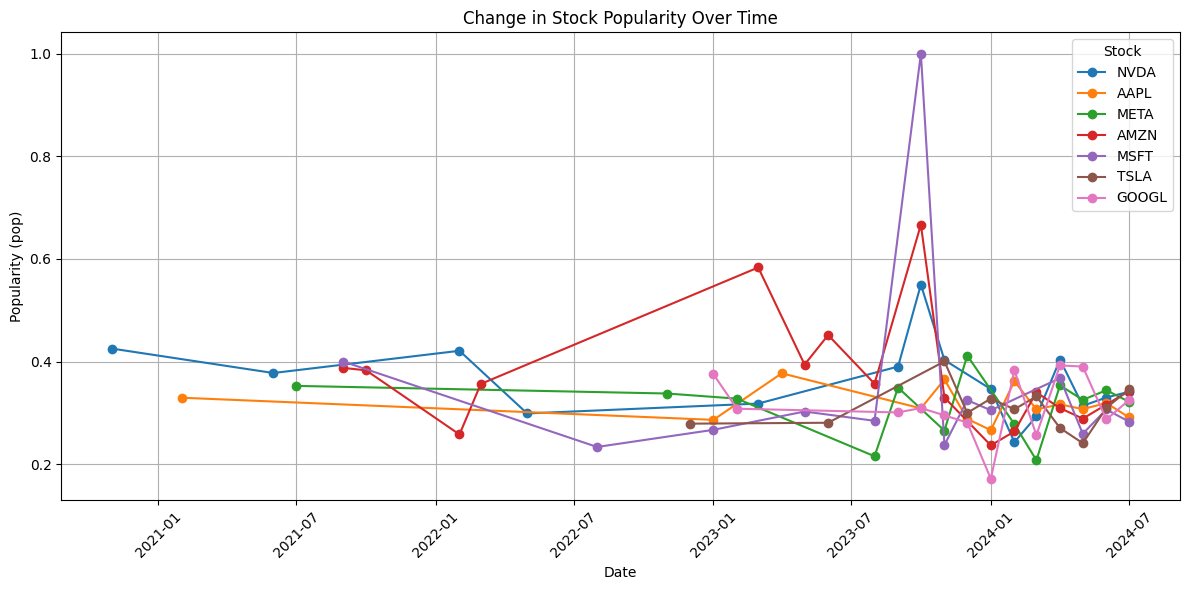

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded file
file_path = 'result/pop.csv'
data = pd.read_csv(file_path)

# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Plot the change in 'pop' over time for each 'stock'
plt.figure(figsize=(12, 6))
for stock in data['stock'].unique():
    stock_data = data[data['stock'] == stock]
    plt.plot(stock_data['date'], stock_data['pop'], marker='o', label=stock)

plt.title('Change in Stock Popularity Over Time')
plt.xlabel('Date')
plt.ylabel('Popularity (pop)')
plt.legend(title='Stock')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [208]:
# Load the uploaded file
file_path = 'result/pop.csv'
data = result

# Convert 'date' to datetime format and ensure it's in Timestamp format
data['date'] = data['date'].dt.to_timestamp()

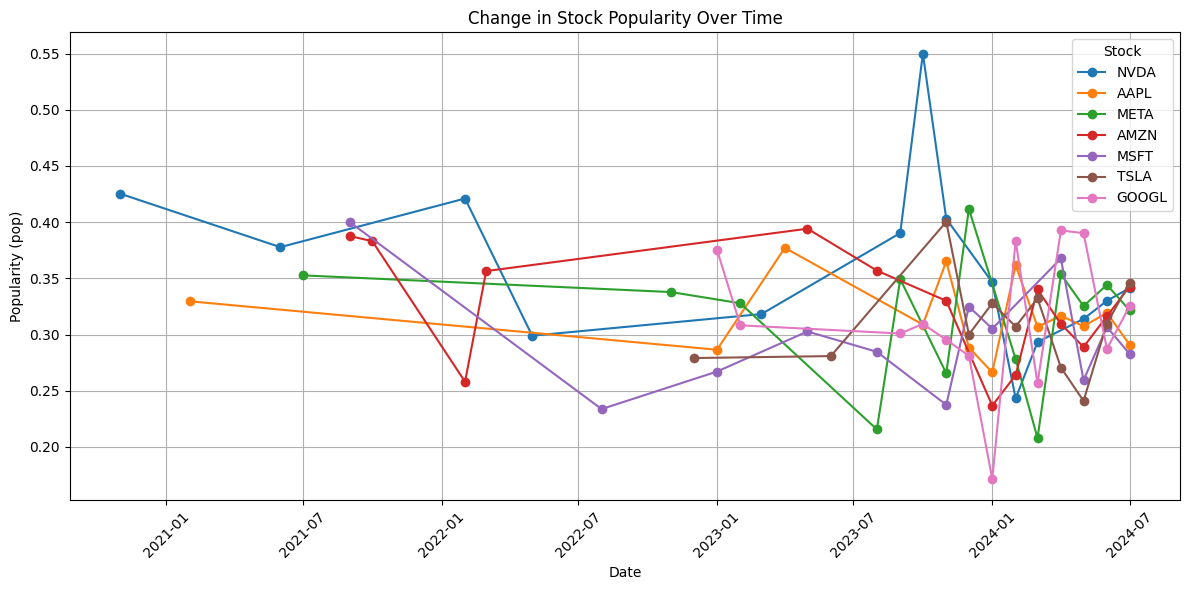

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded file

# Plot the change in 'pop' over time for each 'stock'
plt.figure(figsize=(12, 6))
for stock in data['stock'].unique():
    stock_data = data[data['stock'] == stock]
    plt.plot(stock_data['date'], stock_data['pop'], marker='o', label=stock)

plt.title('Change in Stock Popularity Over Time')
plt.xlabel('Date')
plt.ylabel('Popularity (pop)')
plt.legend(title='Stock')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()